In [1]:
import pandas as pd
import numpy as np

def compute_rsi(series, period=14):
    delta = series.diff()

    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    # Exponential Moving Average (lebih halus daripada SMA)
    roll_up = pd.Series(gain).ewm(span=period, adjust=False).mean()
    roll_down = pd.Series(loss).ewm(span=period, adjust=False).mean()

    rs = roll_up / roll_down
    rsi = 100 - (100 / (1 + rs))

    return rsi

def compute_tech_var(df, target_cols, lags=[1,3], mas=[3,6], rsi_period=14):
    df = df.copy()

    for col in target_cols:
        # Lag features
        for lag in lags:
            df[f"{col}_lag{lag}"] = df[col].shift(lag)

        # Moving averages
        for ma in mas:
            df[f"{col}_ma{ma}"] = df[col].rolling(window=ma).mean()

        # MoM Growth
        df[f"{col}_mom_growth"] = df[col].pct_change()

        # Rolling Volatility
        for ma in mas:
            df[f"{col}_vol{ma}"] = df[col].rolling(window=ma).std()

        # Market Share
        df[f"{col}_share"] = df[col] / df[target_cols].sum(axis=1)

        # RSI
        df[f"{col}_rsi{rsi_period}"] = compute_rsi(df[col], period=rsi_period)

    return df


In [2]:
%ls

sample_data/


In [3]:
data_link = {
    "kurs": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/kurs.csv",
    "inflasi": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/inflasi.csv",
    "bi_rate": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/bi_rate_data.csv",
    "data_eksternal": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/data_eksternal_lengkap.csv",
    "dataset_utama": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/dataCarSale2021-2025.csv",
}

In [4]:
import numpy as np

seed = 404
np.random.seed(seed)
"Done"

'Done'

In [5]:
dataframes = {}
for name, link in data_link.items():
    # Correct the raw link for direct download
    raw_link = link.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    try:
        dataframes[name] = pd.read_csv(raw_link)
        print(f"Successfully loaded '{name}' data.")
    except Exception as e:
        print(f"Error loading '{name}' data: {e}")

# Display the first few rows of each loaded dataframe
for name, df in dataframes.items():
    print(f"\n--- {name} Data ---")
    display(df.tail(20))

Successfully loaded 'kurs' data.
Successfully loaded 'inflasi' data.
Successfully loaded 'bi_rate' data.
Successfully loaded 'data_eksternal' data.
Successfully loaded 'dataset_utama' data.

--- kurs Data ---


,jpy,usd,tanggal
3792,10464,9412,2010-01-29
3793,10469,9455,2010-01-28
3794,10551,9427,2010-01-27
3795,10363,9362,2010-01-26
3796,10411,9387,2010-01-25
3797,10482,9435,2010-01-22
3798,10238,9366,2010-01-21
3799,10227,9321,2010-01-20
3800,10232,9271,2010-01-19
3801,10224,9276,2010-01-18



--- inflasi Data ---


,date,inflasi
167,2011-08-01,4.79
168,2011-07-01,4.61
169,2011-06-01,5.54
170,2011-05-01,5.98
171,2011-04-01,6.16
172,2011-03-01,6.65
173,2011-02-01,6.84
174,2011-01-01,7.02
175,2010-12-01,6.96
176,2010-11-01,6.33



--- bi_rate Data ---


,Tanggal,BI Rate
172,01/5/2024,6.25
173,01/6/2024,6.25
174,01/7/2024,6.25
175,01/8/2024,6.25
176,01/9/2024,6
177,01/10/2024,6
178,01/11/2024,6
179,01/12/2024,6
180,01/1/2025,5.75
181,01/2/2025,5.75



--- data_eksternal Data ---


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
112,2019-05-01,14178.0,11048.0,11761.0,8775.0,29103.0
113,2019-06-01,6020.0,7563.0,11968.0,7236.0,18541.0
114,2019-07-01,13013.0,13894.0,14600.0,8172.0,29362.0
115,2019-08-01,15415.0,11909.0,14240.0,8622.0,28929.0
116,2019-09-01,17537.0,12431.0,12712.0,8118.0,31831.0
117,2019-10-01,17530.0,14503.0,13983.0,8721.0,30944.0
118,2019-11-01,15911.0,13210.0,11974.0,10077.0,28970.0
119,2019-12-01,10855.0,12305.0,13327.0,10116.0,27453.0
120,2020-01-01,14173.0,12777.0,12295.0,10512.0,24119.0
121,2020-02-01,15778.0,11373.0,10903.0,8613.0,25053.0



--- dataset_utama Data ---


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
34,2023-11-01,7466.000,10307.000,6600.000,6602.000,24622.000
35,2024-01-01,7348.196,3222.119,5076.613,3242.000,10366.353
36,2024-02-01,6021.329,3829.318,4349.666,2999.000,10770.845
37,2024-03-01,6591.920,5212.549,4708.298,3503.000,12301.583
38,2024-04-01,7510.349,3435.000,4898.000,2555.000,9116.144
39,2024-05-01,9336.778,5055.000,5522.211,2736.000,9445.956
40,2024-06-01,7717.478,2875.069,4931.160,2198.000,10798.472
41,2024-07-01,7908.271,3703.054,5335.011,2557.000,13457.905
42,2024-08-01,7984.985,3574.084,6498.000,2582.000,11031.562
43,2024-09-01,7941.067,4418.000,6685.000,2677.000,9911.210


In [6]:
import pandas as pd

# --- Load data kurs ---
# Pastikan sudah terisi dari dataframes['kurs']
df_kurs = dataframes['kurs'].copy()

# Bersihkan kolom jpy (ada tanda koma)
df_kurs["jpy"] = df_kurs["jpy"].astype(str).str.replace(",", ".").astype(float)
df_kurs["usd"] = df_kurs["usd"].astype(float)
df_kurs["tanggal"] = pd.to_datetime(df_kurs["tanggal"])

# Agregasi kurs per bulan (ambil rata-rata)
kurs_monthly = (
    df_kurs.groupby(df_kurs["tanggal"].dt.to_period("M"))
    [["jpy", "usd"]]
    .mean()
    .reset_index()
)
kurs_monthly["tanggal"] = kurs_monthly["tanggal"].dt.to_timestamp()

# --- Load data inflasi ---
# Pastikan sudah terisi dari dataframes['inflasi']
df_inflasi = dataframes['inflasi'].copy()
df_inflasi["date"] = pd.to_datetime(df_inflasi["date"])

# Data inflasi sudah per bulan → hanya perlu diurutkan ascending
inflasi_monthly = df_inflasi.sort_values("date").reset_index(drop=True)

# --- Cek hasil ---
print("\n=== Kurs Monthly (aggregated) ===")
print(kurs_monthly.head())

print("\n=== Inflasi Monthly (sorted ascending) ===")
print(inflasi_monthly.head())



=== Kurs Monthly (aggregated) ===
     tanggal           jpy          usd
0 2010-01-01  10220.055000  9321.950000
1 2010-02-01  10405.052632  9395.105263
2 2010-03-01  10187.445455  9219.681818
3 2010-04-01   9711.700000  9072.333333
4 2010-05-01  10020.826316  9229.157895

=== Inflasi Monthly (sorted ascending) ===
        date  inflasi
0 2010-01-01     3.72
1 2010-02-01     3.81
2 2010-03-01     3.43
3 2010-04-01     3.91
4 2010-05-01     4.16


In [7]:
dataframes['kurs'] = kurs_monthly.copy()
dataframes['inflasi'] = inflasi_monthly.copy()

In [8]:
for key in dataframes:
  display(dataframes[key].head(10))

,tanggal,jpy,usd
0,2010-01-01,10220.055000,9321.950000
1,2010-02-01,10405.052632,9395.105263
2,2010-03-01,10187.445455,9219.681818
3,2010-04-01,9711.700000,9072.333333
4,2010-05-01,10020.826316,9229.157895
5,2010-06-01,10111.295455,9194.000000
6,2010-07-01,10376.954545,9094.454545
7,2010-08-01,10553.047619,9016.761905
8,2010-09-01,10688.473684,9020.842105
9,2010-10-01,10958.714286,8972.904762


,date,inflasi
0,2010-01-01,3.72
1,2010-02-01,3.81
2,2010-03-01,3.43
3,2010-04-01,3.91
4,2010-05-01,4.16
5,2010-06-01,5.05
6,2010-07-01,6.22
7,2010-08-01,6.44
8,2010-09-01,5.80
9,2010-10-01,5.67


,Tanggal,BI Rate
0,01/1/2010,6.5
1,01/2/2010,6.5
2,01/3/2010,6.5
3,01/4/2010,6.5
4,01/5/2010,6.5
5,01/6/2010,6.5
6,01/7/2010,6.5
7,01/8/2010,6.5
8,01/9/2010,6.5
9,01/10/2010,6.5


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2010-01-01,8302.0,3755.0,6855.0,4815.0,20798.0
1,2010-02-01,7518.0,4431.0,8246.0,4638.0,21753.0
2,2010-03-01,8084.0,5179.0,9068.0,6203.0,26222.0
3,2010-04-01,9298.0,5154.0,9560.0,6013.0,24381.0
4,2010-05-01,9485.0,4439.0,9544.0,6043.0,21024.0
5,2010-06-01,11886.0,5965.0,8875.0,6704.0,26006.0
6,2010-07-01,11524.0,6006.0,9586.0,5623.0,27737.0
7,2010-08-01,9741.0,6025.0,9310.0,6063.0,22638.0
8,2010-09-01,6652.0,3504.0,7299.0,4924.0,18413.0
9,2010-10-01,10708.0,5970.0,9407.0,7015.0,25322.0


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2021-01-01,8993.0,7231.0,9108.0,6400.0,15474.0
1,2021-02-01,9412.0,6812.0,7567.0,4600.0,14645.0
2,2021-03-01,16770.0,11350.0,13088.0,8669.0,26034.0
3,2021-04-01,15861.0,8474.0,13820.0,8100.0,22618.0
4,2021-05-01,8310.0,5832.0,10160.0,5341.0,17361.0
5,2021-06-01,15481.0,8782.0,8277.0,8965.0,22310.0
6,2021-07-01,9284.0,9030.0,13453.0,6274.0,20950.0
7,2021-08-01,14408.0,7337.0,13720.0,10021.0,28418.0
8,2021-09-01,17529.0,3453.0,12200.0,7515.0,32596.0
9,2021-10-01,17020.0,5861.0,13109.0,7624.0,20633.0


In [9]:
# Select the two dataframes to combine
df_eksternal = dataframes['data_eksternal'].copy()
df_utama = dataframes['dataset_utama'].copy()

# Standardize date column names and convert to datetime
df_eksternal = df_eksternal.rename(columns={'waktu': 'date'})
df_eksternal['date'] = pd.to_datetime(df_eksternal['date'])

df_utama = df_utama.rename(columns={'waktu': 'date'})
df_utama['date'] = pd.to_datetime(df_utama['date'])

# Concatenate the dataframes, placing df_utama below df_eksternal
combined_df = pd.concat([df_eksternal, df_utama], ignore_index=True)

# Sort by date
combined_df = combined_df.sort_values('date').reset_index(drop=True)

print("Combined DataFrame (data_eksternal on top, dataset_utama below):")
display(combined_df.head())
display(combined_df.tail())

Combined DataFrame (data_eksternal on top, dataset_utama below):


,date,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2010-01-01,8302.0,3755.0,6855.0,4815.0,20798.0
1,2010-02-01,7518.0,4431.0,8246.0,4638.0,21753.0
2,2010-03-01,8084.0,5179.0,9068.0,6203.0,26222.0
3,2010-04-01,9298.0,5154.0,9560.0,6013.0,24381.0
4,2010-05-01,9485.0,4439.0,9544.0,6043.0,21024.0


,date,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
181,2025-03-01,6371.692,2382.924,7380.0,3223.220,13711.773
182,2025-04-01,6075.811,1590.411,5197.0,2767.379,13779.300
183,2025-05-01,7537.632,3148.000,5897.0,2004.813,9313.266
184,2025-06-01,5992.367,2360.797,6501.0,3499.336,8712.383
185,2025-07-01,6354.101,4171.007,6121.0,2666.235,7617.122


In [10]:
# Load the original bi_rate dataframe
bi_rate_df = dataframes['bi_rate'].copy()

# Convert 'Tanggal' to datetime, specifying the original format
bi_rate_df['Tanggal'] = pd.to_datetime(bi_rate_df['Tanggal'], format='%d/%m/%Y', errors='coerce')

# Set the date to the first day of the month and format as YYYY-MM-DD
bi_rate_df['Tanggal'] = bi_rate_df['Tanggal'].dt.to_period('M').dt.to_timestamp('D') + pd.offsets.MonthBegin(0)
bi_rate_df['Tanggal'] = bi_rate_df['Tanggal'].dt.strftime('%Y-%m-%d')

# Handle potential non-numeric 'BI Rate' values by coercing to numeric
bi_rate_df['BI Rate'] = pd.to_numeric(bi_rate_df['BI Rate'], errors='coerce')

# Update the dataframe in the dataframes dictionary
dataframes['bi_rate'] = bi_rate_df

print("Processed dataframes['bi_rate'] with 'Tanggal' in YYYY-MM-DD format:")
display(dataframes['bi_rate'].head())

Processed dataframes['bi_rate'] with 'Tanggal' in YYYY-MM-DD format:


,Tanggal,BI Rate
0,2010-01-01,6.5
1,2010-02-01,6.5
2,2010-03-01,6.5
3,2010-04-01,6.5
4,2010-05-01,6.5


In [11]:
kurs = dataframes['kurs'].copy()
inflasi = dataframes['inflasi'].copy()
bi_rate = dataframes['bi_rate'].copy()
data = combined_df.copy()

In [12]:
def combineDf(dfs):
  return pd.concat(dfs, ignore_index=True)

In [13]:
dfs = [kurs, inflasi, bi_rate, data]

In [14]:
# Standardize date columns and names before merging

# kurs
kurs_processed = dfs[0].copy()
kurs_processed = kurs_processed.rename(columns={'tanggal': 'date'})
# Ensure date is datetime and set to first of month if needed (assuming it's already monthly from previous steps)
kurs_processed['date'] = pd.to_datetime(kurs_processed['date'])


# inflasi
inflasi_processed = dfs[1].copy()
# Ensure date is datetime and set to first of month if needed (assuming it's already monthly from previous steps)
inflasi_processed['date'] = pd.to_datetime(inflasi_processed['date'])


# bi_rate
bi_rate_processed = dfs[2].copy()
bi_rate_processed = bi_rate_processed.rename(columns={'Tanggal': 'date'})
# Ensure date is datetime and set to first of month if needed (assuming it's already processed in 8xgidzZ0qaHj)
bi_rate_processed['date'] = pd.to_datetime(bi_rate_processed['date'])
# Handle potential duplicates after standardizing date
bi_rate_processed['BI Rate'] = pd.to_numeric(bi_rate_processed['BI Rate'], errors='coerce')
bi_rate_processed = bi_rate_processed.groupby('date')['BI Rate'].mean().reset_index()


# data (combined_df)
data_processed = dfs[3].copy()
# Ensure date is datetime and set to first of month if needed (assuming it's already processed in h7AI2EbBM80d)
data_processed['date'] = pd.to_datetime(data_processed['date'])
# Handle potential duplicates after standardizing date
# Assuming all columns except date should be averaged if dates are duplicated
numeric_cols = data_processed.select_dtypes(include=np.number).columns.tolist()
data_processed = data_processed.groupby('date')[numeric_cols].mean().reset_index()


# Merge all dataframes
merged_all_df = kurs_processed
merged_all_df = pd.merge(merged_all_df, inflasi_processed, on='date', how='outer')
merged_all_df = pd.merge(merged_all_df, bi_rate_processed, on='date', how='outer')
merged_all_df = pd.merge(merged_all_df, data_processed, on='date', how='outer')

# Sort by date
merged_all_df = merged_all_df.sort_values('date').reset_index(drop=True)

print("Merged DataFrame (all dataframes from dfs list):")
display(merged_all_df.head(10))
display(merged_all_df.tail(10))

Merged DataFrame (all dataframes from dfs list):


,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2010-01-01,10220.055000,9321.950000,3.72,6.5,8302.0,3755.0,6855.0,4815.0,20798.0
1,2010-02-01,10405.052632,9395.105263,3.81,6.5,7518.0,4431.0,8246.0,4638.0,21753.0
2,2010-03-01,10187.445455,9219.681818,3.43,6.5,8084.0,5179.0,9068.0,6203.0,26222.0
3,2010-04-01,9711.700000,9072.333333,3.91,6.5,9298.0,5154.0,9560.0,6013.0,24381.0
4,2010-05-01,10020.826316,9229.157895,4.16,6.5,9485.0,4439.0,9544.0,6043.0,21024.0
5,2010-06-01,10111.295455,9194.000000,5.05,6.5,11886.0,5965.0,8875.0,6704.0,26006.0
6,2010-07-01,10376.954545,9094.454545,6.22,6.5,11524.0,6006.0,9586.0,5623.0,27737.0
7,2010-08-01,10553.047619,9016.761905,6.44,6.5,9741.0,6025.0,9310.0,6063.0,22638.0
8,2010-09-01,10688.473684,9020.842105,5.80,6.5,6652.0,3504.0,7299.0,4924.0,18413.0
9,2010-10-01,10958.714286,8972.904762,5.67,6.5,10708.0,5970.0,9407.0,7015.0,25322.0


,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
182,2025-03-01,11097.894737,16538.526316,1.03,5.75,6371.692,2382.924,7380.0,3223.220,13711.773
183,2025-04-01,11771.125000,16904.000000,1.95,5.75,6075.811,1590.411,5197.0,2767.379,13779.300
184,2025-05-01,11455.470588,16522.823529,1.60,5.50,7537.632,3148.000,5897.0,2004.813,9313.266
185,2025-06-01,11343.555556,16391.944444,1.87,5.50,5992.367,2360.797,6501.0,3499.336,8712.383
186,2025-07-01,11154.869565,16357.782609,2.37,5.25,6354.101,4171.007,6121.0,2666.235,7617.122
187,2025-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,2025-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,2025-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,2025-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,2025-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Save the merged dataframe to a CSV file
merged_all_df.to_csv('merged_data.csv', index=False)

print("merged_all_df saved to /tmp/merged_data.csv")

merged_all_df saved to /tmp/merged_data.csv


In [16]:
processed_df = compute_tech_var(merged_all_df, ["TOYOTA", "DAIHATSU","MITSUBISHI","HONDA","SUZUKI"])

/tmp/ipython-input-2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ipython-input-2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ipython-input-2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ipython-

In [17]:
import pandas as pd

# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

# Display the head of the processed_df
display(processed_df.head())
display(processed_df.head())

,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA,TOYOTA_lag1,TOYOTA_lag3,TOYOTA_ma3,TOYOTA_ma6,TOYOTA_mom_growth,TOYOTA_vol3,TOYOTA_vol6,TOYOTA_share,TOYOTA_rsi14,DAIHATSU_lag1,DAIHATSU_lag3,DAIHATSU_ma3,DAIHATSU_ma6,DAIHATSU_mom_growth,DAIHATSU_vol3,DAIHATSU_vol6,DAIHATSU_share,DAIHATSU_rsi14,MITSUBISHI_lag1,MITSUBISHI_lag3,MITSUBISHI_ma3,MITSUBISHI_ma6,MITSUBISHI_mom_growth,MITSUBISHI_vol3,MITSUBISHI_vol6,MITSUBISHI_share,MITSUBISHI_rsi14,HONDA_lag1,HONDA_lag3,HONDA_ma3,HONDA_ma6,HONDA_mom_growth,HONDA_vol3,HONDA_vol6,HONDA_share,HONDA_rsi14,SUZUKI_lag1,SUZUKI_lag3,SUZUKI_ma3,SUZUKI_ma6,SUZUKI_mom_growth,SUZUKI_vol3,SUZUKI_vol6,SUZUKI_share,SUZUKI_rsi14
0,2010-01-01,10220.055000,9321.950000,3.72,6.5,8302.0,3755.0,6855.0,4815.0,20798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108141,NaN
1,2010-02-01,10405.052632,9395.105263,3.81,6.5,7518.0,4431.0,8246.0,4638.0,21753.0,20798.0,NaN,NaN,NaN,0.045918,NaN,NaN,0.466943,100.000000,8302.0,NaN,NaN,NaN,-0.094435,NaN,NaN,0.161379,0.000000,6855.0,NaN,NaN,NaN,0.202918,NaN,NaN,0.177006,100.000000,3755.0,NaN,NaN,NaN,0.180027,NaN,NaN,0.095114,100.000000,4815.0,NaN,NaN,NaN,-0.036760,NaN,NaN,0.099558,0.000000
2,2010-03-01,10187.445455,9219.681818,3.43,6.5,8084.0,5179.0,9068.0,6203.0,26222.0,21753.0,NaN,22924.333333,NaN,0.205443,2895.506922,NaN,0.478888,100.000000,7518.0,NaN,7968.000000,NaN,0.075286,404.667765,NaN,0.147637,45.444813,8246.0,NaN,8056.333333,NaN,0.099685,1118.625198,NaN,0.165607,100.000000,4431.0,NaN,4455.000000,NaN,0.168811,712.303306,NaN,0.094583,100.000000,4638.0,NaN,5218.666667,NaN,0.337430,857.039283,NaN,0.113284,91.073091
3,2010-04-01,9711.700000,9072.333333,3.91,6.5,9298.0,5154.0,9560.0,6013.0,24381.0,26222.0,20798.0,24118.666667,NaN,-0.070208,2246.019665,NaN,0.448131,71.375015,8084.0,8302.0,8300.000000,NaN,0.150173,909.445985,NaN,0.170900,74.323277,9068.0,6855.0,8958.000000,NaN,0.054257,663.870469,NaN,0.175716,100.000000,5179.0,3755.0,4921.333333,NaN,-0.004827,424.825062,NaN,0.094732,97.883182,6203.0,4815.0,5618.000000,NaN,-0.030630,854.005269,NaN,0.110521,80.768742
4,2010-05-01,10020.826316,9229.157895,4.16,6.5,9485.0,4439.0,9544.0,6043.0,21024.0,24381.0,21753.0,23875.666667,NaN,-0.137689,2635.587664,NaN,0.416028,44.546204,9298.0,7518.0,8955.666667,NaN,0.020112,760.653885,NaN,0.187692,76.531273,9560.0,8246.0,9390.666667,NaN,-0.001674,279.552023,NaN,0.188859,99.185876,5154.0,4431.0,4924.000000,NaN,-0.138727,420.208282,NaN,0.087840,57.627494,6013.0,4638.0,6086.333333,NaN,0.004989,102.143690,NaN,0.119580,81.157154


,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA,TOYOTA_lag1,TOYOTA_lag3,TOYOTA_ma3,TOYOTA_ma6,TOYOTA_mom_growth,TOYOTA_vol3,TOYOTA_vol6,TOYOTA_share,TOYOTA_rsi14,DAIHATSU_lag1,DAIHATSU_lag3,DAIHATSU_ma3,DAIHATSU_ma6,DAIHATSU_mom_growth,DAIHATSU_vol3,DAIHATSU_vol6,DAIHATSU_share,DAIHATSU_rsi14,MITSUBISHI_lag1,MITSUBISHI_lag3,MITSUBISHI_ma3,MITSUBISHI_ma6,MITSUBISHI_mom_growth,MITSUBISHI_vol3,MITSUBISHI_vol6,MITSUBISHI_share,MITSUBISHI_rsi14,HONDA_lag1,HONDA_lag3,HONDA_ma3,HONDA_ma6,HONDA_mom_growth,HONDA_vol3,HONDA_vol6,HONDA_share,HONDA_rsi14,SUZUKI_lag1,SUZUKI_lag3,SUZUKI_ma3,SUZUKI_ma6,SUZUKI_mom_growth,SUZUKI_vol3,SUZUKI_vol6,SUZUKI_share,SUZUKI_rsi14
0,2010-01-01,10220.055000,9321.950000,3.72,6.5,8302.0,3755.0,6855.0,4815.0,20798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108141,NaN
1,2010-02-01,10405.052632,9395.105263,3.81,6.5,7518.0,4431.0,8246.0,4638.0,21753.0,20798.0,NaN,NaN,NaN,0.045918,NaN,NaN,0.466943,100.000000,8302.0,NaN,NaN,NaN,-0.094435,NaN,NaN,0.161379,0.000000,6855.0,NaN,NaN,NaN,0.202918,NaN,NaN,0.177006,100.000000,3755.0,NaN,NaN,NaN,0.180027,NaN,NaN,0.095114,100.000000,4815.0,NaN,NaN,NaN,-0.036760,NaN,NaN,0.099558,0.000000
2,2010-03-01,10187.445455,9219.681818,3.43,6.5,8084.0,5179.0,9068.0,6203.0,26222.0,21753.0,NaN,22924.333333,NaN,0.205443,2895.506922,NaN,0.478888,100.000000,7518.0,NaN,7968.000000,NaN,0.075286,404.667765,NaN,0.147637,45.444813,8246.0,NaN,8056.333333,NaN,0.099685,1118.625198,NaN,0.165607,100.000000,4431.0,NaN,4455.000000,NaN,0.168811,712.303306,NaN,0.094583,100.000000,4638.0,NaN,5218.666667,NaN,0.337430,857.039283,NaN,0.113284,91.073091
3,2010-04-01,9711.700000,9072.333333,3.91,6.5,9298.0,5154.0,9560.0,6013.0,24381.0,26222.0,20798.0,24118.666667,NaN,-0.070208,2246.019665,NaN,0.448131,71.375015,8084.0,8302.0,8300.000000,NaN,0.150173,909.445985,NaN,0.170900,74.323277,9068.0,6855.0,8958.000000,NaN,0.054257,663.870469,NaN,0.175716,100.000000,5179.0,3755.0,4921.333333,NaN,-0.004827,424.825062,NaN,0.094732,97.883182,6203.0,4815.0,5618.000000,NaN,-0.030630,854.005269,NaN,0.110521,80.768742
4,2010-05-01,10020.826316,9229.157895,4.16,6.5,9485.0,4439.0,9544.0,6043.0,21024.0,24381.0,21753.0,23875.666667,NaN,-0.137689,2635.587664,NaN,0.416028,44.546204,9298.0,7518.0,8955.666667,NaN,0.020112,760.653885,NaN,0.187692,76.531273,9560.0,8246.0,9390.666667,NaN,-0.001674,279.552023,NaN,0.188859,99.185876,5154.0,4431.0,4924.000000,NaN,-0.138727,420.208282,NaN,0.087840,57.627494,6013.0,4638.0,6086.333333,NaN,0.004989,102.143690,NaN,0.119580,81.157154


In [18]:
processed_df.isna().sum()

,0
date,0
jpy,5
usd,5
inflasi,5
BI Rate,5
DAIHATSU,6
HONDA,6
MITSUBISHI,6
SUZUKI,6
TOYOTA,6


In [19]:
# Handle missing values in processed_df

# Check the number of missing values before handling
print("Missing values before handling:")
display(processed_df.isna().sum())

# Drop rows with any missing values. This is a simple approach,
# especially useful for handling NaNs introduced by initial rolling calculations.
processed_df_cleaned = processed_df.dropna().reset_index(drop=True)

print("\nMissing values after dropping rows with NaNs:")
display(processed_df_cleaned.isna().sum())

print("\nHead of the cleaned dataframe:")
display(processed_df_cleaned.head(10))
display(processed_df_cleaned.tail(10))

Missing values before handling:


,0
date,0
jpy,5
usd,5
inflasi,5
BI Rate,5
DAIHATSU,6
HONDA,6
MITSUBISHI,6
SUZUKI,6
TOYOTA,6



Missing values after dropping rows with NaNs:


,0
date,0
jpy,0
usd,0
inflasi,0
BI Rate,0
DAIHATSU,0
HONDA,0
MITSUBISHI,0
SUZUKI,0
TOYOTA,0



Head of the cleaned dataframe:


,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA,TOYOTA_lag1,TOYOTA_lag3,TOYOTA_ma3,TOYOTA_ma6,TOYOTA_mom_growth,TOYOTA_vol3,TOYOTA_vol6,TOYOTA_share,TOYOTA_rsi14,DAIHATSU_lag1,DAIHATSU_lag3,DAIHATSU_ma3,DAIHATSU_ma6,DAIHATSU_mom_growth,DAIHATSU_vol3,DAIHATSU_vol6,DAIHATSU_share,DAIHATSU_rsi14,MITSUBISHI_lag1,MITSUBISHI_lag3,MITSUBISHI_ma3,MITSUBISHI_ma6,MITSUBISHI_mom_growth,MITSUBISHI_vol3,MITSUBISHI_vol6,MITSUBISHI_share,MITSUBISHI_rsi14,HONDA_lag1,HONDA_lag3,HONDA_ma3,HONDA_ma6,HONDA_mom_growth,HONDA_vol3,HONDA_vol6,HONDA_share,HONDA_rsi14,SUZUKI_lag1,SUZUKI_lag3,SUZUKI_ma3,SUZUKI_ma6,SUZUKI_mom_growth,SUZUKI_vol3,SUZUKI_vol6,SUZUKI_share,SUZUKI_rsi14
0,2010-06-01,10111.295455,9194.000000,5.05,6.50,11886.0,5965.0,8875.0,6704.0,26006.0,21024.0,26222.0,23803.666667,23364.000000,0.236967,2540.682257,2483.461053,0.437546,66.261972,9485.0,8084.0,10223.000000,9095.500000,0.253137,1443.232137,1556.977039,0.199980,89.679378,9544.0,9068.0,9326.333333,8691.333333,-0.070096,390.947993,1022.514091,0.149320,71.214540,4439.0,5179.0,5186.000000,4820.500000,0.343771,763.503111,772.291072,0.100360,78.948279,6043.0,6203.0,6253.333333,5736.000000,0.109383,390.576924,822.184408,0.112794,87.549884
1,2010-07-01,10376.954545,9094.454545,6.22,6.50,11524.0,6006.0,9586.0,5623.0,27737.0,26006.0,24381.0,24922.333333,24520.500000,0.066562,3485.232034,2659.011602,0.458645,70.839948,11886.0,9298.0,10965.000000,9632.500000,-0.030456,1294.434626,1769.669093,0.190555,81.715203,8875.0,9560.0,9335.000000,9146.500000,0.080113,398.924805,531.586964,0.158509,78.611270,5965.0,5154.0,5470.000000,5195.666667,0.006873,893.107496,693.943417,0.099312,79.271620,6704.0,6013.0,6123.333333,5870.666667,-0.161247,544.959020,697.947467,0.092979,53.377742
2,2010-08-01,10553.047619,9016.761905,6.44,6.50,9741.0,6025.0,9310.0,6063.0,22638.0,27737.0,21024.0,25460.333333,24668.000000,-0.183834,2592.925825,2494.230382,0.420961,48.480654,11524.0,9485.0,11050.333333,10003.000000,-0.154721,1148.271019,1440.533512,0.181137,54.306407,9586.0,9544.0,9257.000000,9323.833333,-0.028792,358.450833,296.672491,0.173122,70.497416,6006.0,4439.0,5998.666667,5461.333333,0.003164,30.664855,646.125891,0.112037,79.440472,5623.0,6043.0,6130.000000,6108.166667,0.078250,543.605556,350.639654,0.112743,60.600207
3,2010-09-01,10688.473684,9020.842105,5.80,6.50,6652.0,3504.0,7299.0,4924.0,18413.0,22638.0,26006.0,22929.333333,23366.500000,-0.186633,4668.822157,3395.662572,0.451388,37.242235,9741.0,11886.0,9305.666667,9764.333333,-0.317113,2465.001487,1875.129507,0.163071,32.508990,9310.0,8875.0,8731.666667,9029.000000,-0.216004,1248.376679,889.158254,0.178932,37.744622,6025.0,5965.0,5178.333333,5182.166667,-0.418423,1450.046321,1036.458473,0.085899,35.352201,6063.0,6704.0,5536.666667,5895.000000,-0.187861,574.386920,589.127830,0.120710,41.430023
4,2010-10-01,10958.714286,8972.904762,5.67,6.50,10708.0,5970.0,9407.0,7015.0,25322.0,18413.0,27737.0,22124.333333,23523.333333,0.375224,3483.024596,3472.745638,0.433433,56.339214,6652.0,11524.0,9033.666667,9999.333333,0.609741,2118.495771,1893.264025,0.183287,58.030841,7299.0,9586.0,8672.000000,9003.500000,0.288807,1190.041596,872.929951,0.161018,60.141997,3504.0,6006.0,5166.333333,5318.166667,0.703767,1439.885528,1084.448508,0.102188,60.250901,4924.0,5623.0,6000.666667,6062.000000,0.424655,1046.892704,749.466477,0.120075,64.929959
5,2010-11-01,10908.666667,8983.285714,6.33,6.50,12932.0,5750.0,9791.0,7003.0,22623.0,25322.0,22638.0,22119.333333,23789.833333,-0.106587,3481.929111,3299.624549,0.389387,49.543715,10708.0,9741.0,10097.333333,10573.833333,0.207695,3184.224448,2203.539736,0.222586,66.133406,9407.0,9310.0,8832.333333,9044.666667,0.040821,1341.714326,908.612275,0.168523,62.944113,5970.0,6025.0,5074.666667,5536.666667,-0.036851,1364.677740,1000.723272,0.098969,57.953280,7015.0,6063.0,6314.000000,6222.000000,-0.001711,1203.790264,841.429736,0.120536,64.757907
6,2010-12-01,10879.000000,9067.619048,6.96,6.50,12461.0,5158.0,8942.0,6166.0,23763.

,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA,TOYOTA_lag1,TOYOTA_lag3,TOYOTA_ma3,TOYOTA_ma6,TOYOTA_mom_growth,TOYOTA_vol3,TOYOTA_vol6,TOYOTA_share,TOYOTA_rsi14,DAIHATSU_lag1,DAIHATSU_lag3,DAIHATSU_ma3,DAIHATSU_ma6,DAIHATSU_mom_growth,DAIHATSU_vol3,DAIHATSU_vol6,DAIHATSU_share,DAIHATSU_rsi14,MITSUBISHI_lag1,MITSUBISHI_lag3,MITSUBISHI_ma3,MITSUBISHI_ma6,MITSUBISHI_mom_growth,MITSUBISHI_vol3,MITSUBISHI_vol6,MITSUBISHI_share,MITSUBISHI_rsi14,HONDA_lag1,HONDA_lag3,HONDA_ma3,HONDA_ma6,HONDA_mom_growth,HONDA_vol3,HONDA_vol6,HONDA_share,HONDA_rsi14,SUZUKI_lag1,SUZUKI_lag3,SUZUKI_ma3,SUZUKI_ma6,SUZUKI_mom_growth,SUZUKI_vol3,SUZUKI_vol6,SUZUKI_share,SUZUKI_rsi14
166,2024-10-01,10474.086957,15619.043478,1.71,6.00,7210.293,4317.616,6064.000,2773.000,10008.012,9911.210,13457.905,10316.928000,10775.519500,0.009767,620.780937,1439.799592,0.329504,48.001787,7941.067,7908.271,7712.115000,8016.478667,-0.092025,435.145019,707.236131,0.237392,41.233202,6685.000,5335.011,6415.666667,5839.230333,-0.092895,318.581753,689.805093,0.199652,52.905491,4418.000,3703.054,4103.233333,3990.470500,-0.022722,460.997288,764.609073,0.142153,52.869026,2677.000,2557.000,2677.333333,2587.166667,0.035861,95.500436,208.395217,0.091298,49.699613
167,2024-11-01,10324.350000,15891.400000,1.55,6.00,7145.146,2824.359,6494.000,2943.000,11404.092,10008.012,11031.562,10441.104667,11101.875500,0.139496,835.374832,1292.550129,0.370135,54.004876,7210.293,7984.985,7432.168667,7651.206667,-0.009035,441.920998,378.524295,0.231905,40.800294,6064.000,6498.000,6414.333333,6001.195167,0.070910,318.072843,714.140287,0.210772,57.176075,4317.616,3574.084,3853.325000,3618.697000,-0.345852,892.523114,681.239303,0.091668,43.393866,2773.000,2582.000,2797.666667,2621.666667,0.061305,134.704615,250.785699,0.095519,52.487562
168,2024-12-01,10516.050000,16103.600000,1.57,6.00,7222.224,1831.878,5499.339,3820.000,11571.896,11404.092,9911.210,10994.666667,11230.779500,0.014714,858.577381,1294.804798,0.386434,54.729711,7145.146,7941.067,7192.554333,7568.664333,0.010787,41.487947,413.559676,0.241180,41.636806,6494.000,6685.000,6019.113000,6095.891667,-0.153166,498.847430,566.226375,0.183646,46.034327,2824.359,4418.000,2991.284333,3444.831833,-0.351400,1251.247938,977.629776,0.061174,38.150385,2943.000,2677.000,3178.666667,2892.000000,0.297995,561.877507,475.919321,0.127566,64.274282
169,2025-01-01,10429.368421,16343.315789,0.76,5.75,5755.232,3932.347,5916.224,3370.613,14236.853,11571.896,10008.012,12404.280333,11360.604167,0.230296,1589.270738,1572.123440,0.428675,64.873467,7222.224,7210.293,6707.534000,7209.824500,-0.203122,825.617695,806.940644,0.173292,31.776263,5499.339,6064.000,5969.854333,6192.760500,0.075806,499.494530,447.236222,0.178139,50.681980,1831.878,4317.616,2862.861333,3483.047333,1.146621,1050.763688,994.085479,0.118404,52.242469,3820.000,2773.000,3377.871000,3027.602167,-0.117641,438.545048,477.286857,0.101490,56.052772
170,2025-02-01,10797.400000,16419.750000,-0.09,5.75,7126.837,3758.004,7707.092,3047.704,16225.180,14236.853,11404.092,14011.309667,12226.207167,0.139661,2334.826619,2506.714125,0.428503,70.553651,5755.232,7145.146,6701.431000,7066.799833,0.238323,820.819152,712.606877,0.188218,45.659641,5916.224,6494.000,6374.218333,6394.275833,0.302705,1172.971626,768.957652,0.203542,65.436594,3932.347,2824.359,3174.076333,3513.700667,-0.044336,1165.641945,1000.270507,0.099248,51.126831,3370.613,2943.000,3412.772333,3105.219500,-0.095801,387.870255,425.372733,0.080489,50.678209
171,2025-03-01,11097.894737,16538.526316,1.03,5.75,6371.692,2382.924,7380.000,3223.220,13711.773,16225.180,11571.896,14724.602000,12859.634333,-0.154908,1325.793348,2274.132478,0.414634,57.088814,7126.837,7222.224,6417.920333,6805.237333,-0.105958,686.970060,607.846194,0.192675,40.432764,7707.092,5499.339,7001.105333,6510.109167,-0.042440,953.662899,867.537524,0.223166,61.555591,3758.004,1831.878,3357.758333,3174.521333,-0.365907,848.719832,977.071983,0.072058,42.807462,3047.704,3820.0

In [20]:
!pip install u8darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.8/344.8 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found exi

In [21]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 22.2 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
from darts.utils.statistics import check_seasonality
from darts.models import RandomForestModel
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression  # optional jika mau probabilistik
import itertools
import warnings
warnings.filterwarnings("ignore")


In [23]:
# --- 0) Siapkan data ---
data = processed_df.copy()
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')  # pastikan urut
data.set_index('date', inplace=True)

features = ['jpy', 'usd', 'inflasi', 'BI Rate',
            'DAIHATSU_lag1', 'HONDA_lag1', 'MITSUBISHI_lag1', 'TOYOTA_lag1',
            'TOYOTA_ma3', 'TOYOTA_mom_growth']
targets = ['DAIHATSU', 'HONDA', 'MITSUBISHI', 'SUZUKI', 'TOYOTA']
data = data.dropna()



In [24]:
# Pastikan TIDAK ada leakage di fitur buatan:
# contoh aman (kalau perlu rebuat):
# data['TOYOTA_ma3']       = data['TOYOTA'].shift(1).rolling(3).mean()
# data['TOYOTA_mom_growth']= data['TOYOTA'].pct_change().shift(1)
# data[['DAIHATSU_lag1','HONDA_lag1','MITSUBISHI_lag1','TOYOTA_lag1']] = \
#     data[['DAIHATSU','HONDA','MITSUBISHI','TOYOTA']].shift(1)

data = data.interpolate('linear').ffill().bfill()

In [32]:
# normalisasi anchor bulanan
is_month_start_major = (data.index.day == 1).mean() >= 0.5
how  = 'start' if is_month_start_major else 'end'
freq = 'MS' if is_month_start_major else 'ME'


In [33]:
# ===================== 2) TimeSeries =====================
series_X = TimeSeries.from_dataframe(data[features], freq=freq, fill_missing_dates=True)
series_y = TimeSeries.from_dataframe(data[targets],  freq=freq, fill_missing_dates=True)


In [34]:
# ===================== 3) Fitur kalender (month-of-year) =====================
# Encoders: bulan 1-12 sebagai covariates (past & future sama nilainya untuk kalender)
month_attr = datetime_attribute_timeseries(series_y.time_index, attribute="month", one_hot=True)
# Gabungkan ke covariates eksternal (past covariates untuk RF)
covars = month_attr.stack(series_X)  # [kalender + fitur ekonometrik kamu]


In [35]:
# ===================== 4) Train/Test split =====================
split_idx = int(len(series_y) * 0.8)
y_train, y_test = series_y[:split_idx], series_y[split_idx:]
X_train, X_test = covars[:split_idx], covars[split_idx:]

# ===================== 5) Scaling TANPA leakage =====================
scaler_y = Scaler()   # MinMax default
scaler_X = Scaler()

y_train_s = scaler_y.fit_transform(y_train)
y_test_s  = scaler_y.transform(y_test)

X_train_s = scaler_X.fit_transform(X_train)
# untuk prediksi multi-step, past_covariates harus mencakup beberapa langkah sebelum awal test
max_back = 12  # sinkron dengan lags_past_covariates di bawah
X_pred_s = scaler_X.transform(covars[split_idx - max_back:])

In [36]:
# from darts.utils.model_selection import backtest_forecasting
# print(darts.__version__)
# import darts
# print(darts.__version__)


In [37]:
from darts.models import RandomForestModel
from darts.metrics import smape, mape, rmse
import numpy as np

def rf_early_stopping(
    lags_t, lags_x,
    max_features,
    max_depth=None,
    min_samples_leaf=1,
    start_estimators=100,   # mulai dari 100 tree
    step_estimators=50,     # tambah 50 tree tiap iterasi
    max_estimators=800,     # batas atas
    patience=2,             # berhenti jika tidak membaik setelah 2 iterasi
    y_train_s=None, X_train_s=None,
    scaler_y=None,
    # validation window = bagian terakhir dari train (mis. 15%)
    val_frac=0.15,
    covars_full=None, split_idx=None
):
    """
    - lags_t: int (mis. 6) -> otomatis [-1..-lags_t]
    - lags_x: list negatif (mis. [-1,-2,-3,-6,-12])
    - covars_full: covariates unscaled (TimeSeries) untuk membuat window prediksi val
    - split_idx: index split train/test (int) supaya kita bisa siapkan window covariates dengan aman
    """
    # 1) Siapkan inner train & validation dari y_train_s / X_train_s
    n_train = len(y_train_s)
    val_len = max(1, int(n_train * val_frac))
    inner_train = y_train_s[:-val_len]
    inner_X     = X_train_s[:-val_len]
    val_y       = y_train_s[-val_len:]
    # past_cov untuk prediksi val harus mengandung history max_back sebelum awal val
    max_back = max(lags_t, max((-min(lags_x), 0)) if lags_x else 0)

    # ambil indeks absolut (berdasarkan series penuh sebelum scaling),
    # kita asumsi `split_idx` adalah batas awal test; inner train + val berada < split_idx
    # maka window covariates val dimulai dari (split_idx - val_len)
    # namun kita perlu history max_back sebelum awal val:
    val_start_idx = split_idx - val_len
    cov_start = max(val_start_idx - max_back, 0)

    # transform covariates untuk window [cov_start : split_idx]
    X_val_cov = scaler_X.transform(covars_full[cov_start:split_idx])

    best_score = np.inf
    best_n     = None
    no_improve = 0
    history    = []

    for n_estimators in range(start_estimators, max_estimators + 1, step_estimators):
        model = RandomForestModel(
            lags=lags_t,
            lags_past_covariates=lags_x,
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,   # 'sqrt'|'log2'|None|float(0,1]
            min_samples_leaf=min_samples_leaf,
            random_state=42,
            output_chunk_length=1,
            multi_models=True,
            # jika versi darts/sklearn mendukung paralel:
            # n_jobs=-1
        )

        # fit di inner train (bukan full train) agar validasi “jujur”
        model.fit(series=inner_train, past_covariates=inner_X)

        # prediksi sepanjang val_len
        pred_val_s = model.predict(
            n=val_len,
            past_covariates=X_val_cov
        )

        # inverse scale untuk evaluasi
        pred_val = scaler_y.inverse_transform(pred_val_s)
        val_gt   = scaler_y.inverse_transform(val_y)

        score = smape(val_gt, pred_val)
        history.append((n_estimators, score))

        # early stopping logic
        if score + 1e-9 < best_score:
            best_score = score
            best_n     = n_estimators
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                break

    return best_n, best_score, history


In [38]:
lags_t = 6
lags_x = [-1, -2, -3, -6, -12]
max_features = 0.6
max_depth = None
min_leaf = 1


In [39]:
best_n, best_val_smape, hist = rf_early_stopping(
    lags_t=6,
    lags_x=[-1,-2,-3,-6,-12],
    max_features=0.6,
    max_depth=None,
    min_samples_leaf=1,
    start_estimators=150,
    step_estimators=50,
    max_estimators=800,
    patience=2,
    y_train_s=y_train_s,
    X_train_s=X_train_s,
    scaler_y=scaler_y,
    val_frac=0.15,
    covars_full=covars,   # covars unscaled penuh
    split_idx=split_idx
)

print("Early-stopped best n_estimators:", best_n)
print("Val sMAPE at best n:", best_val_smape)
print("Trace (n, sMAPE):", hist[:5], " ...", hist[-5:])


Early-stopped best n_estimators: 200
Val sMAPE at best n: 21.47641926549479
Trace (n, sMAPE): [(150, np.float64(21.545405474879246)), (200, np.float64(21.47641926549479)), (250, np.float64(22.032225169436007)), (300, np.float64(22.13763415928758))]  ... [(150, np.float64(21.545405474879246)), (200, np.float64(21.47641926549479)), (250, np.float64(22.032225169436007)), (300, np.float64(22.13763415928758))]


In [41]:
lags_t = 6
lags_x = [-1, -2, -3, -6, -12]
best_n = 200
max_features = 0.6
max_depth = None
min_samples_leaf = 1

final_model = RandomForestModel(
    lags=lags_t,
    lags_past_covariates=lags_x,
    n_estimators=best_n,
    max_depth=max_depth,
    max_features=max_features,
    min_samples_leaf=min_samples_leaf,
    random_state=42,
    output_chunk_length=1,
    multi_models=True,
)


In [42]:
final_model.fit(series=y_train_s, past_covariates=X_train_s)


RandomForestModel(lags=6, lags_past_covariates=[-1, -2, -3, -6, -12], lags_future_covariates=None, output_chunk_length=1, output_chunk_shift=0, add_encoders=None, n_estimators=200, max_depth=None, multi_models=True, use_static_covariates=True, random_state=42, max_features=0.6, min_samples_leaf=1)

In [43]:
# === 2) Siapkan covariates untuk prediksi test (harus cukup history) ===
max_back = max(lags_t, abs(min(lags_x)))  # 12
X_pred_s = scaler_X.transform(covars[split_idx - max_back : ])

# === 3) Prediksi test ===
n_h = len(y_test_s)
pred_s = final_model.predict(n=n_h, past_covariates=X_pred_s)

# === 4) Balikkan skala & metrik keseluruhan ===
pred  = scaler_y.inverse_transform(pred_s)
ytest = scaler_y.inverse_transform(y_test_s)

print("TEST sMAPE:", smape(ytest, pred))
print("TEST  MAPE:", mape(ytest, pred))
print("TEST  RMSE:", rmse(ytest, pred))

TEST sMAPE: 42.488664616652855
TEST  MAPE: 66.29708465954556
TEST  RMSE: 4687.136620717401


In [44]:
brands = ["DAIHATSU", "HONDA", "MITSUBISHI", "SUZUKI", "TOYOTA"]

for brand in brands:
    act = ytest.univariate_component(brand)
    fc  = pred.univariate_component(brand)
    print(f"\n--- {brand} ---")
    print("sMAPE:", smape(act, fc))
    print("MAPE :", mape(act, fc))
    print("RMSE :", rmse(act, fc))



--- DAIHATSU ---
sMAPE: 40.15375817282731
MAPE : 50.74574306511044
RMSE : 4742.319307837915

--- HONDA ---
sMAPE: 50.072368638428635
MAPE : 96.37943702781467
RMSE : 4192.592652863419

--- MITSUBISHI ---
sMAPE: 34.40848973739678
MAPE : 44.071557293546086
RMSE : 3239.504560901433

--- SUZUKI ---
sMAPE: 51.8137053796726
MAPE : 88.4010346171261
RMSE : 3325.441894122134

--- TOYOTA ---
sMAPE: 35.99500115493893
MAPE : 51.887651294130464
RMSE : 7935.824687862102


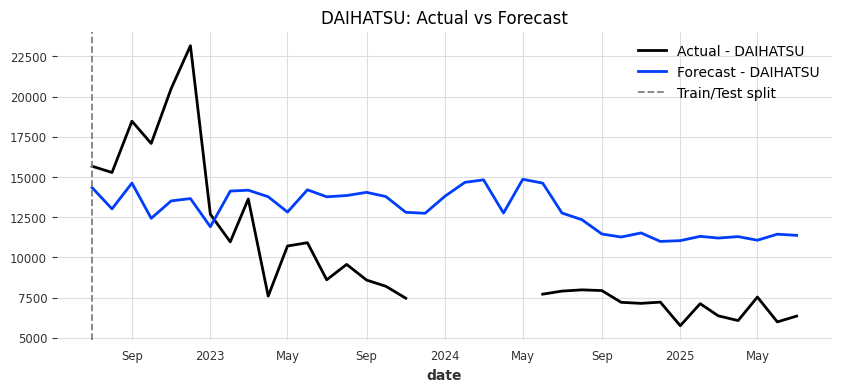

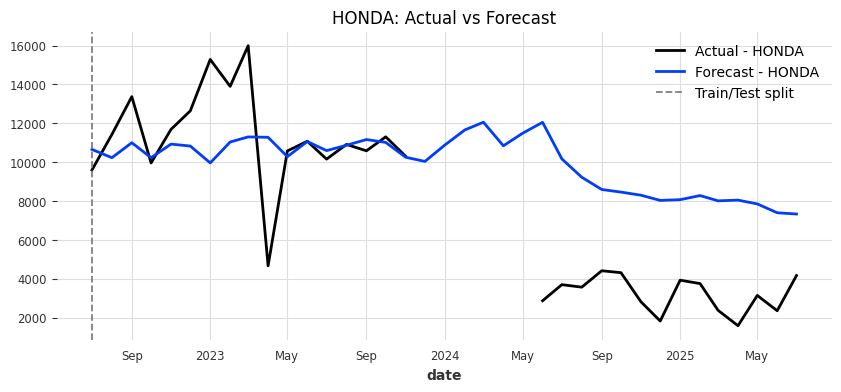

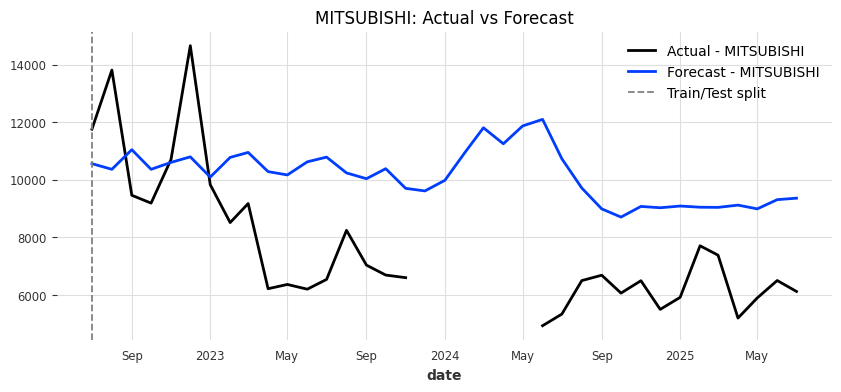

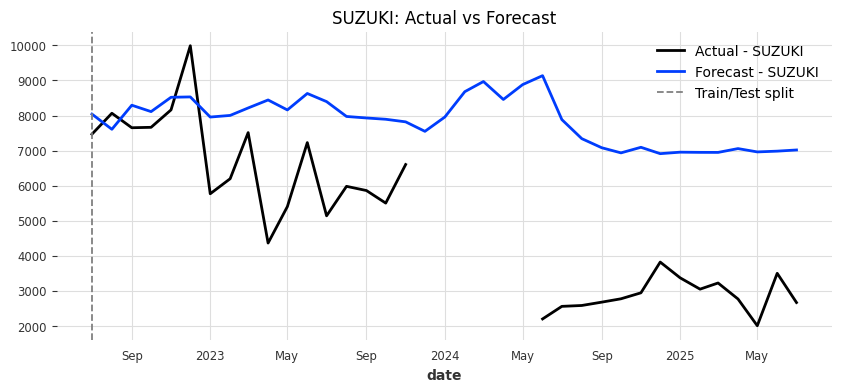

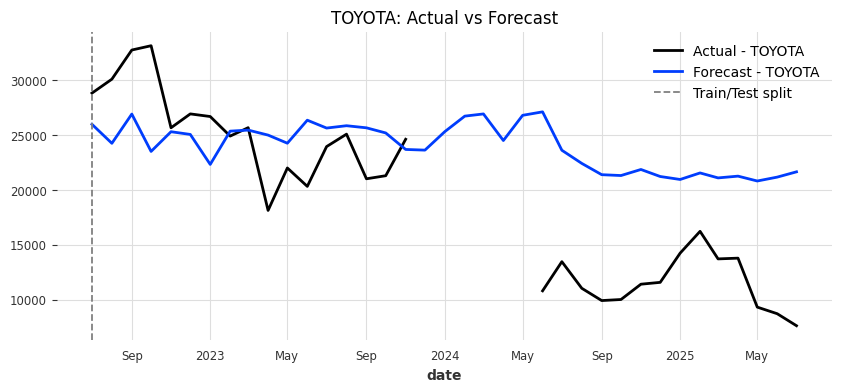

In [45]:
import matplotlib.pyplot as plt

for brand in brands:
    act = ytest.univariate_component(brand)
    fc  = pred.univariate_component(brand)

    plt.figure(figsize=(10, 4))
    act.plot(label=f"Actual - {brand}")
    fc.plot(label=f"Forecast - {brand}")
    plt.axvline(x=ytest.start_time(), color="gray", linestyle="--", label="Train/Test split")
    plt.title(f"{brand}: Actual vs Forecast")
    plt.legend()
    plt.show()
